In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Automobile_data.csv")

print(df.info())

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             61 non-null     int64  
 1   company           61 non-null     object 
 2   body-style        61 non-null     object 
 3   wheel-base        61 non-null     float64
 4   length            61 non-null     float64
 5   engine-type       61 non-null     object 
 6   num-of-cylinders  61 non-null     object 
 7   horsepower        61 non-null     int64  
 8   average-mileage   61 non-null     int64  
 9   price             58 non-null     float64
dtypes: float64(3), int64(3), object(4)
memory usage: 4.9+ KB
None


,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
0,0,Alfa-romero_Motors,sports,88.6,168.8,dohcv,four,116,21,12946.48
1,1,Alfa-romero_Motors,sports,88.6,168.8,dohcv,four,115,22,16930.53
2,2,Alfa-romero_Motors,hatchback,94.5,171.2,ohcv,six,149,18,16468.30
3,3,Audi_Motors,sedan,99.8,176.6,ohc,four,98,25,13912.20
4,4,Audi_Motors,sedan,99.4,176.6,ohc,five,119,20,17281.33


# Exercise

> 1. what is the average price and average mileage for convertible cars
> 2. Sort cars by company and price in decending order
> 3. Save data for 'Audi_motors' separately
> 4. which company is producing most expensive car?
> 5. Name the cars on basis of maximum length, highest wheelbase, maximum horsepower 
> 6. company wise average price of cars and order them in decending order
> 7. create a column named: "decision", If wheel-base is less than 100 and length is less than 175 then "don't buy" else "buy"
> 8. Select only cars whose decision is "buy"; find average price based on company of car

In [3]:
#1
convertibledf= df.loc[df["body-style"]=="convertible"]
print(convertibledf.groupby(["body-style"])["average-mileage"].agg([np.mean]).rename(columns={"mean":"Average-mileage of convertible cars"}))
convertibledf.groupby(["body-style"])["price"].agg([np.mean]).rename(columns={"mean":"Average-price of convertible cars"})

Empty DataFrame
Columns: [Average-mileage of convertible cars]
Index: []


,Average-price of convertible cars
body-style,


In [4]:
#1
convertibledf= df.loc[df["body-style"]=="convertible"]
df1=convertibledf[['price','average-mileage']].mean()
df1


price             NaN
average-mileage   NaN
dtype: float64

In [5]:
#2
df2=df.sort_values(by=["company","price"],ascending=False)
df2

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
60,88,Volvo_Motors,wagon,104.3,188.8,ohc,four,118,21,13182.29
59,87,Volvo_Motors,sedan,104.3,188.8,ohc,four,111,21,11826.39
58,86,Volkswagen_Motors,sedan,97.3,171.7,ohc,four,98,26,9961.01
56,81,Volkswagen_Motors,sedan,97.3,171.7,ohc,four,81,27,8714.06
57,82,Volkswagen_Motors,sedan,97.3,171.7,ohc,four,49,37,8108.45
...,...,...,...,...,...,...,...,...,...,...
5,5,Audi_Motors,sedan,99.8,177.3,ohc,five,110,21,15632.37
3,3,Audi_Motors,sedan,99.8,176.6,ohc,four,98,25,13912.20
1,1,Alfa-romero_Motors,sports,88.6,168.8,dohcv,four,115,22,16930.53
2,2,Alfa-romero_Motors,hatchback,94.5,171.2,ohcv,six,149,18,16468.30


In [6]:
#question 3
df3= df.loc[df["company"]=="Audi_Motors"]
df3

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
3,3,Audi_Motors,sedan,99.8,176.6,ohc,four,98,25,13912.20
4,4,Audi_Motors,sedan,99.4,176.6,ohc,five,119,20,17281.33
5,5,Audi_Motors,sedan,99.8,177.3,ohc,five,110,21,15632.37
6,6,Audi_Motors,wagon,105.8,192.7,ohc,five,115,20,18914.45


In [7]:
#4
df4=pd.DataFrame([df.sort_values("price",ascending=False).iloc[0]['company']])
df4

,0
0,Mercedes-benz_Motors


In [8]:
#5
lmax=df.sort_values("length", ascending=False).iloc[0]["company"]
hmax=df.sort_values("horsepower", ascending=False).iloc[0]["company"]
wmax=df.sort_values("wheel-base", ascending=False).iloc[0]["company"]
lmax,hmax,wmax
df5=pd.DataFrame({"length":[lmax],"horsepowe":[hmax],"wheelbase":[wmax]})
df5


,length,horsepowe,wheelbase
0,Mercedes-benz_Motors,Porsche_Motors,Mercedes-benz_Motors


In [9]:
#6
df6=pd.DataFrame(df.groupby(["company"])["price"].mean())
df6.sort_values("price",ascending=False)

,price
company,
Jaguar_Motors,35616.343333
Porsche_Motors,34947.730000
Mercedes-benz_Motors,34883.472500
Bmw_Motors,26576.866667
Audi_Motors,16435.087500
Alfa-romero_Motors,15448.436667
Volvo_Motors,12504.340000
Mazda_Motors,9958.504000
Honda_Motors,9902.616667


In [10]:
#7
df["decision"]=np.where((df["wheel-base"]<100)&(df["length"]<175),"don't buy","buy")


In [11]:
#8
buyc=df.loc[df["decision"]=="buy"]
df8=pd.DataFrame(buyc.groupby(["company"])["price"].mean())
df8

,price
company,
Audi_Motors,16435.087500
Bmw_Motors,26576.866667
Honda_Motors,12567.500000
Jaguar_Motors,35616.343333
Mazda_Motors,19663.330000
Mercedes-benz_Motors,34883.472500
Nissan_Motors,14778.280000
Porsche_Motors,NaN
Toyota_Motors,15833.570000


In [12]:
#1
convertibledf= df.loc[df["body-style"]=="convertible"]
df1=convertibledf[['price','average-mileage']].mean()
#2
df2=df.sort_values(by=["company","price"],ascending=False)
#question 3
df3= df.loc[df["company"]=="toyota"]
#4
df4=pd.DataFrame([df.sort_values("price",ascending=False).iloc[0]['company']])
#5
lmax=df.sort_values("length", ascending=False).iloc[0]["company"]
hmax=df.sort_values("horsepower", ascending=False).iloc[0]["company"]
wmax=df.sort_values("wheel-base", ascending=False).iloc[0]["company"]
lmax,hmax,wmax
df5=pd.DataFrame({"length":[lmax],"horsepowe":[hmax],"wheelbase":[wmax]})
#6
df6=pd.DataFrame(df.groupby(["company"])["price"].mean())
df6.sort_values("price",ascending=False)
#7
df["decision"]=np.where((df["wheel-base"]<100)&(df["length"]<175),"don't buy","buy")
df7=pd.DataFrame(df)
#8
buyc=df.loc[df["decision"]=="buy"]
df8=pd.DataFrame(buyc.groupby(["company"])["price"].mean())
with pd.ExcelWriter("pafinal1.xlsx")as writer:
    df1.to_excel(writer, sheet_name='output1', index=False)
    df2.to_excel(writer, sheet_name='output2', index=False)
    df3.to_excel(writer, sheet_name='output3', index=False)
    df4.to_excel(writer, sheet_name='output4', index=False)
    df5.to_excel(writer, sheet_name='output5', index=False)
    df6.to_excel(writer, sheet_name='output6', index=False)
    df7.to_excel(writer, sheet_name='output7', index=False)
    df8.to_excel(writer, sheet_name='output8', index=False)


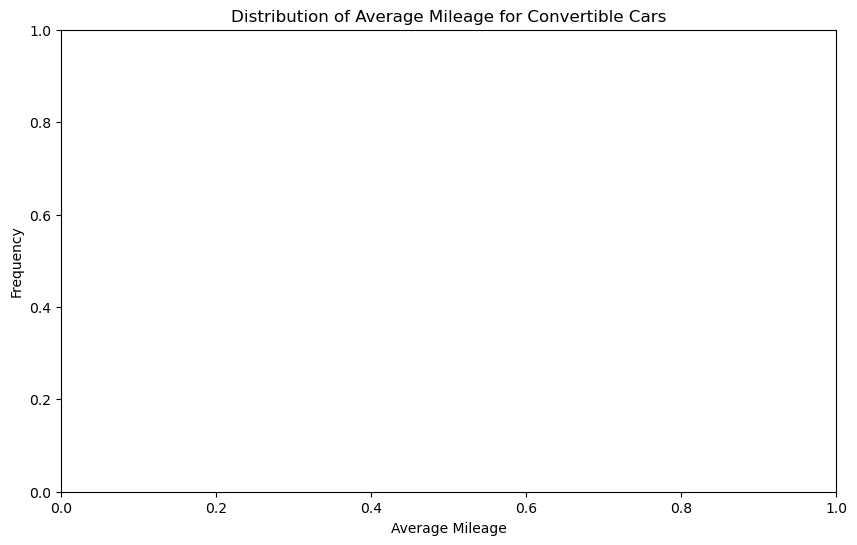

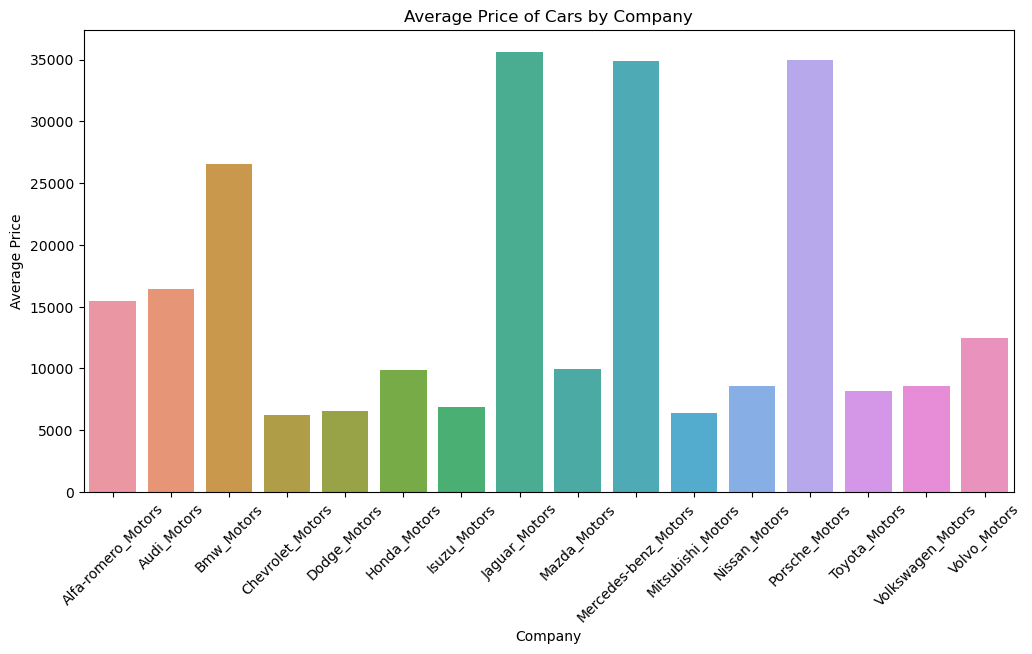

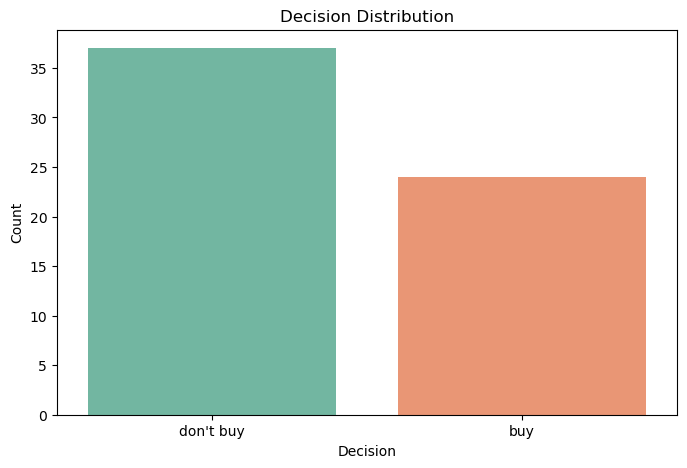

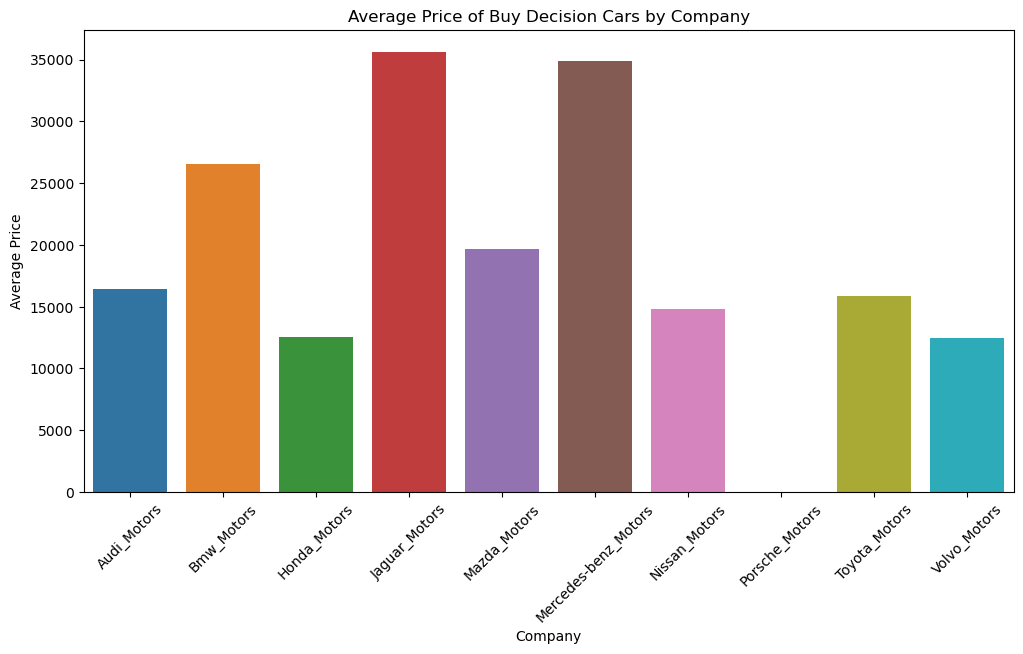

In [13]:
# Visualize the distribution of average mileage for convertible cars
convertible_df = df[df["body-style"] == "convertible"]
plt.figure(figsize=(10, 6))
sns.histplot(convertible_df["average-mileage"], kde=True, color='skyblue')
plt.title("Distribution of Average Mileage for Convertible Cars")
plt.xlabel("Average Mileage")
plt.ylabel("Frequency")
plt.show()

# Sort cars by company and price in descending order
sorted_df = df.sort_values(by=["company", "price"], ascending=False)

# Visualize the average price of cars by company
plt.figure(figsize=(12, 6))
sns.barplot(x="company", y="price", data=df, errorbar=None, estimator=np.mean)
plt.title("Average Price of Cars by Company")
plt.xlabel("Company")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.show()

# Create a column named "decision" based on criteria
df["decision"] = np.where((df["wheel-base"] < 100) & (df["length"] < 175), "don't buy", "buy")

# Visualize the decision distribution
plt.figure(figsize=(8, 5))
sns.countplot(x="decision", data=df, palette="Set2")
plt.title("Decision Distribution")
plt.xlabel("Decision")
plt.ylabel("Count")
plt.show()

# Select only cars whose decision is "buy" and find average price based on company
buy_cars = df[df["decision"] == "buy"]
company_avg_price = buy_cars.groupby("company")["price"].mean().reset_index()

# Visualize the average price of buy decision cars by company
plt.figure(figsize=(12, 6))
sns.barplot(x="company", y="price", data=company_avg_price, errorbar=None)
plt.title("Average Price of Buy Decision Cars by Company")
plt.xlabel("Company")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.show()

